Title: Gauging the Effect of Product Naming: a Gluten-Free Analysis of an Online Grocery App Dataset
Category: python
Date: 2018-07-01
Slug: gluten-free-app
Header_Cover: siteImages/wheat.jpg

Does naming of a product influence its popularity? In this exercise, I use a dataset provided to [Kaggle](https://www.kaggle.com/c/instacart-market-basket-analysis) by Instacart (a grocery ordering and delivery app) in order to try and answer the question about whether including the information about the product being "gluten-free" affects the number of customers who buy it. The analysis is performed in pandas library, and the main statistics explored is Jaccard similarity coefficient.

#__Questions to answer__
##### 1. For two similar products, will the inclusing of "gluten-free" status in the name of one of the products influence its popularity? 
##### 2. Are these results going to be different for different types of products and time of purchase?


In [1]:
#importing necessary libraries and the dataset
from google.colab import drive
import pandas as pd
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
df = pd.read_csv("drive/My Drive/datasets/order_new_foranalysis.csv", index_col = 'Unnamed: 0')

/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
#checking the data
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,soft drinks,beverages
1,1187899,1,train,11,4,8,14.0,25133,2,1,Organic String Cheese,21,16,packaged cheese,dairy eggs
2,1187899,1,train,11,4,8,14.0,38928,3,1,0% Greek Strained Yogurt,120,16,yogurt,dairy eggs
3,1187899,1,train,11,4,8,14.0,26405,4,1,XL Pick-A-Size Paper Towel Rolls,54,17,paper goods,household
4,1187899,1,train,11,4,8,14.0,39657,5,1,Milk Chocolate Almonds,45,19,candy chocolate,snacks


In [13]:
#simple cleaning of the name column
df["product_name"] = df.product_name.str.lower()
df["product_name"] = df.product_name.str.replace(r"[^\w\s]", "")
df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1187899,1,train,11,4,8,14.0,196,1,1,soda,77,7,soft drinks,beverages
1,1187899,1,train,11,4,8,14.0,25133,2,1,organic string cheese,21,16,packaged cheese,dairy eggs
2,1187899,1,train,11,4,8,14.0,38928,3,1,0 greek strained yogurt,120,16,yogurt,dairy eggs
3,1187899,1,train,11,4,8,14.0,26405,4,1,xl pickasize paper towel rolls,54,17,paper goods,household
4,1187899,1,train,11,4,8,14.0,39657,5,1,milk chocolate almonds,45,19,candy chocolate,snacks


In [0]:
def jaccard_sim(str1):
    """A function to check Jaccard similarity coefficient
    (intersection divided by union of sets) of an item name
    and a list of other names, returns a tuple - a match with highest score and a score"""
    set1 = set(str1.split())
    maxn = products[0]
    set2 = set(maxn.split())
    intersec = set1.intersection(set2)
    maxv = float(len(intersec) / (len(set1)+len(set2) - len(intersec)))
    for name in products[1:]:
        set2 = set(name.split())
        intersec = set1.intersection(set2)
        result = float(len(intersec) / (len(set1)+len(set2) - len(intersec)))
        if result > maxv:
            maxv = result
            maxn = name
    to_return = (maxn, maxv)
    return to_return

In [0]:
gf = df[df["product_name"].str.contains("gluten")]

In [16]:
print(gf.department.value_counts())
#reducing departments to 5 with the highest number of orders
gf = gf[gf["department"].str.contains("snacks|frozen|bakery|breakfast|dry goods pasta")]
df = df[df["department"].str.contains("snacks|frozen|bakery|breakfast|dry goods pasta")]

frozen             5029
snacks             4967
bakery             2505
breakfast          2189
dry goods pasta    1744
pantry              768
international       511
deli                476
babies              266
dairy eggs          142
canned goods         98
personal care        40
missing              39
other                14
meat seafood         12
Name: department, dtype: int64


In [0]:
products = gf.product_name.unique()

In [18]:
gluten = df[~df.product_name.isin(products)]
print(df.shape)
print(gf.shape)
print(gluten.shape)
df.shape[0] == gf.shape[0] + gluten.shape[0]

(335895, 15)
(16434, 15)
(319461, 15)


True

In [19]:
#checking if there are no gluten-free products missed in "gluten"
gluten[gluten.product_name.str.contains("gluten")]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department


In [0]:
#counting the highest jaccard similarity for non-gluten-free items to see if there are items with names similar to ones
#gluten-free
pd.options.mode.chained_assignment = None
gluten.loc[:,"paired"] = gluten["product_name"].apply(jaccard_sim).copy()

In [22]:
#adding columns for most similar product and the similarity scor
gluten["paired_item"] = gluten["paired"].apply(lambda x: x[0])
gluten["paired_score"] = gluten["paired"].apply(lambda x: x[1])
gluten.drop("paired", axis = 1, inplace = True)
gluten.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,paired_item,paired_score
4,1187899,1,train,11,4,8,14.0,39657,5,1,milk chocolate almonds,45,19,candy chocolate,snacks,gluten free chocolate brownies,0.166667
5,1187899,1,train,11,4,8,14.0,10258,6,1,pistachios,117,19,nuts seeds dried fruit,snacks,gluten free whole grain bread,0.000000
6,1187899,1,train,11,4,8,14.0,13032,7,1,cinnamon toast crunch,121,14,cereal,breakfast,gluten free cinnamon french toast sticks,0.285714
7,1187899,1,train,11,4,8,14.0,26088,8,1,aged white cheddar popcorn,23,19,popcorn jerky,snacks,aged white cheddar glutenfree baked rice and c...,0.300000
13,1492625,2,train,15,1,11,30.0,16589,3,1,plantain chips,107,19,chips pretzels,snacks,glutenfree original falafel chips,0.200000


In [23]:
#filtering out items with the score less than 0.5 
analog = gluten[gluten.paired_score > 0.5]
analog.tail(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department,paired_item,paired_score
1382961,2633656,205981,train,7,0,16,30.0,42193,10,0,chocolate chip cookie,61,19,cookies cakes,snacks,chocolate chip cookie gluten free,0.600000
1383093,1220791,205997,train,8,1,18,8.0,25043,10,0,instant oatmeal variety pack,130,14,hot cereal pancake mixes,breakfast,variety pack of gluten free instant oatmeal,0.571429
1383109,3319420,206005,train,24,0,12,10.0,25246,7,0,white cheddar macaroni cheese cups,4,9,instant foods,dry goods pasta,organic glutenfree white cheddar macaroni cheese,0.571429
1383434,2926243,206051,train,38,3,16,6.0,14553,5,0,oats honey granola,57,14,granola,breakfast,oats honey gluten free granola,0.600000
1383824,2682845,206108,train,14,0,18,27.0,35004,29,1,macaroni shells white cheddar cheese,4,9,instant foods,dry goods pasta,organic glutenfree white cheddar macaroni cheese,0.571429
1383830,2682845,206108,train,14,0,18,27.0,40199,35,1,chocolate chip cookies,61,19,cookies cakes,snacks,gluten free chocolate chip cookies,0.600000
1384036,1695230,206128,train,16,2,8,30.0,45866,2,1,fig newmans fruit filled cookies,61,19,cookies cakes,snacks,gluten free fig fruit filled cookies,0.571429
1384194,2721635,206149,train,6,6,10,30.0,45866,9,0,fig newmans fruit filled cookies,61,19,cookies cakes,snacks,gluten free fig fruit filled cookies,0.571429
1384289,2262542,206157,train,11,3,13,30.0,25346,15,0,peanut butter dark chocolate protein bar,3,19,energy granola bars,snacks,gluten free peanut butter cup dark chocolate p...,0.666667
1384395,1533014,206176,train,15,6,16,12.0,258,5,0,vegetable pot pie,38,1,frozen meals,frozen,gluten free vegetable pot pie,0.600000


In [24]:
gfwithanalogs = analog.paired_item.unique()
analogs = analog.product_name.unique()
print("GF:", len(gfwithanalogs), "Non-GF:", len(analogs))

GF: 99 Non-GF: 169


In [0]:
gf = gf[gf["product_name"].isin(gfwithanalogs)]

In [26]:
print(analog.shape)
print(gf.shape)

(11320, 17)
(5013, 15)


In [0]:
gf_per_product = pd.DataFrame({'n':gf.groupby(['product_name']).size()})
gf_per_product = gf_per_product.sort_values(by='n', ascending= False)

analog_per_product = pd.DataFrame({'n':analog.groupby(['product_name']).size()})
analog_per_product = analog_per_product.sort_values(by='n', ascending= False)

In [0]:
gf_per_dept = pd.DataFrame({"n":gf.groupby(["department"]).size()})
gf_per_dept = gf_per_dept.sort_values(by="n", ascending = False)

analog_per_dept = pd.DataFrame({"n": analog.groupby(["department"]).size()})
analog_per_dept = analog_per_dept.sort_values(by="n", ascending = False)

In [29]:
#number of GF items and their analogs per department
print("Gluten-free")
print(gf_per_dept.head())
print("\n\n")
print("Non-gluten analogs \n")
print(analog_per_dept.head())

Gluten-free
                    n
department           
snacks           2044
frozen           1455
bakery           1105
breakfast         358
dry goods pasta    51



Non-gluten analogs 

                    n
department           
snacks           3229
frozen           2651
breakfast        2187
dry goods pasta  2050
bakery           1203


In [30]:
#number of items per aisle
gf_per_aisle = pd.DataFrame({"n":gf.groupby(["aisle"]).size()})
gf_per_aisle = gf_per_aisle.sort_values(by = "n", ascending = False)

analog_per_aisle = pd.DataFrame({"n":analog.groupby(["aisle"]).size()})
analog_per_aisle = analog_per_aisle.sort_values(by = "n", ascending = False)

print("Gluten-free")
print(gf_per_aisle.head(20))
print("\n\n")
print("Non-gluten analogs")
print(analog_per_aisle.head(20))

Gluten-free
                            n
aisle                        
chips pretzels            841
bread                     724
energy granola bars       669
frozen breads doughs      555
cookies cakes             481
frozen meat seafood       321
frozen meals              282
hot cereal pancake mixes  279
breakfast bakery          277
frozen appetizers sides   111
buns rolls                 97
ice cream ice              86
cereal                     63
frozen breakfast           51
crackers                   40
dry pasta                  35
frozen pizza               26
frozen dessert             23
granola                    16
ice cream toppings         13



Non-gluten analogs
                             n
aisle                         
hot cereal pancake mixes  1788
frozen meals              1449
cookies cakes             1184
pasta sauce                991
chips pretzels             895
bread                      889
popcorn jerky              753
frozen appetizers sides    

In [0]:
merged = pd.merge(gf_per_aisle, analog_per_aisle, how="inner", left_index=True, right_index=True)
cols = ["gluten-free", "analog"]
merged.columns = cols

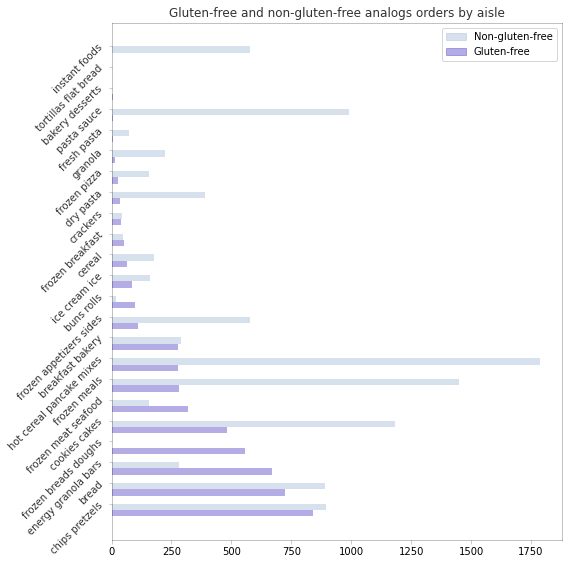

In [32]:
#plotting the results
import matplotlib.patches as mpatches

pos = list(range(len(merged.index)))
width = 0.3

fig, ax = plt.subplots(figsize = (8,8))

freebar = plt.barh(pos, merged["gluten-free"],
        width,
        alpha = 0.5,
        color = "slateblue")
glutenbar = plt.barh([p + width for p in pos],
         merged["analog"],
         width, alpha = 0.5,
         color = "lightsteelblue")


ax.set_yticks([p+1.5 * width for p in pos])
ax.set_yticklabels(merged.index, alpha = 0.8)


ax.yaxis.set_tick_params(rotation = 45)
ax.set_title("Gluten-free and non-gluten-free analogs orders by aisle", alpha = 0.8)

for spine in ax.spines.values():
    spine.set_alpha(0.3)

ax.tick_params(color="silver")

gluten = mpatches.Patch(color = "lightsteelblue", label = "Non-gluten-free", alpha = 0.5)
gluten_free = mpatches.Patch(color = "slateblue", label = "Gluten-free", alpha = 0.5)
plt.legend(handles = [gluten, gluten_free])

plt.tight_layout()

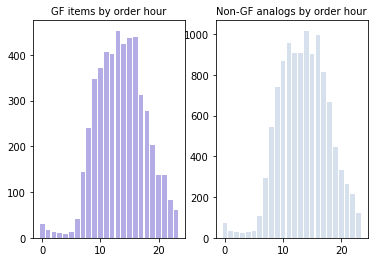

In [34]:
plt.figure()

plt.subplot(1,2,1)
hours = gf.groupby(['order_hour_of_day']).size().index
values = gf.groupby(['order_hour_of_day']).size().values
plt.bar(hours, values, color = 'slateblue', alpha = 0.5)
plt.title('GF items by order hour', fontsize=10)

plt.subplot(1,2,2)
ghours = analog.groupby(['order_hour_of_day']).size().index
gvalues = analog.groupby(['order_hour_of_day']).size().values
plt.bar(ghours, gvalues, color = 'lightsteelblue', alpha = 0.5)
plt.title('Non-GF analogs by order hour', fontsize=10)
plt.show()

# __Conclusion__

> ① Instacart users tend to prefer non-gluten free items if there is a glute-free analog. 

> ② This tendency is particularly stroing for items other than "healthy food" such as cakes, instant food, pancakes.

> ③ The time of purchase for gluten-free items and non-gluten free analogs was similar.






